In [3]:
pip install -U numpy

In [4]:
pip install -U Cython

In [5]:
pip install -U scikit-multiflow

     |████████████████████████████████| 1.1 MB 10.1 MB/s 


In [28]:
pip install pydotplus

In [29]:
from skmultiflow.data import SEAGenerator

In [30]:
from skmultiflow.trees import ExtremelyFastDecisionTreeClassifier

In [31]:
from skmultiflow.data import DataStream

In [32]:
import pandas as pd 
import numpy as np 
import pickle
import time 
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.metrics import classification_report

In [33]:
from matplotlib import pyplot as plt 
import seaborn as sns 
import pydotplus
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:

data_1= pd.read_csv("/data_1.csv")


feature_cols =['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']

X=data_1[feature_cols]
y=data_1['fetal_health']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [50]:
rows= X_train.shape[0]

In [51]:
stream = DataStream(pd.DataFrame(X_train),pd.DataFrame( y_train))

In [52]:
efdt = ExtremelyFastDecisionTreeClassifier()

In [53]:
n_samples = 0
correct_cnt = 0
max_samples = rows

In [54]:
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = efdt.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    efdt.partial_fit(X, y)
    n_samples += 1

In [55]:
print('{} samples analyzed.'.format(n_samples))
print('Extremely Fast Decision Tree accuracy: {}'.format(correct_cnt / n_samples))

1160 samples analyzed.
Extremely Fast Decision Tree accuracy: 0.8663793103448276


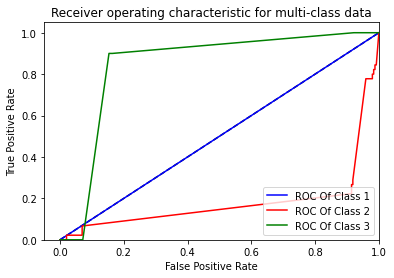

In [56]:
y_score = efdt.predict_proba(np.array(X_test))
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [57]:
data_2= pd.read_csv("/data_2.csv")


feature_cols =['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']

X=data_2[feature_cols]
y=data_2['fetal_health']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [58]:
rows= X_train.shape[0]

In [59]:
stream = DataStream(pd.DataFrame(X_train),pd.DataFrame( y_train))

In [60]:
n_samples = 0
correct_cnt = 0
max_samples = rows

In [61]:
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = efdt.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    efdt.partial_fit(X, y)
    n_samples += 1

In [62]:
print('{} samples analyzed.'.format(n_samples))
print('Extremely Fast Decision Tree accuracy: {}'.format(correct_cnt / n_samples))

540 samples analyzed.
Extremely Fast Decision Tree accuracy: 0.7351851851851852


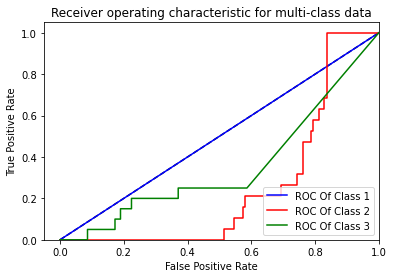

In [63]:
y_score = efdt.predict_proba(np.array(X_test))
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [64]:
import pickle

dbfile = open('DT-C-1', 'ab')
      
    # source, destination
pickle.dump(efdt, dbfile)                     
dbfile.close()